In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
import missingno as msno
%matplotlib inline

from sklearn.ensemble import IsolationForest

In [24]:
#!python --version

# Read The Training Data
We'll do eda on training data only

In [25]:
file_path = r"C:\Users\abhid\Desktop\campusx\flightprice_sagemaker\data\train.csv"

train = pd.read_csv(file_path)

In [26]:
train.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info,duration_min,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,1,In-flight meal not included,940,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1,No Info,1285,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,2,No Info,1420,10975


## Fixing Data Types

In [27]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
total_stops         int64
additional_info    object
duration_min        int64
price               int64
dtype: object

In [28]:
train['date_of_journey'] = pd.to_datetime(train['date_of_journey'])
train['dep_time'] = pd.to_datetime(train['dep_time']).dt.time
train['arrival_time'] = pd.to_datetime(train['arrival_time']).dt.time

In [29]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time                   object
arrival_time               object
total_stops                 int64
additional_info            object
duration_min                int64
price                       int64
dtype: object

## High Level Summary of the Data

In [30]:
train.describe()

,date_of_journey,total_stops,duration_min,price
count,6694,6694.000000,6694.000000,6694.000000
mean,2019-05-04 11:43:39.061846528,0.812668,637.633702,9092.553331
min,2019-03-01 00:00:00,0.000000,75.000000,1759.000000
25%,2019-03-27 00:00:00,0.000000,170.000000,5277.000000
50%,2019-05-15 00:00:00,1.000000,515.000000,8372.000000
75%,2019-06-06 00:00:00,1.000000,925.000000,12373.000000
max,2019-06-27 00:00:00,3.000000,2860.000000,79512.000000
std,NaN,0.658143,504.395941,4670.489223


In [31]:
train.describe(include = 'O')

,airline,source,destination,dep_time,arrival_time,additional_info
count,6694,6694,6694,6694,6694,6694
unique,9,5,5,218,218,8
top,Jet Airways,Delhi,Cochin,18:55:00,19:00:00,No Info
freq,2387,2781,2781,154,396,5226


## Missing Value Inspection

<Axes: >

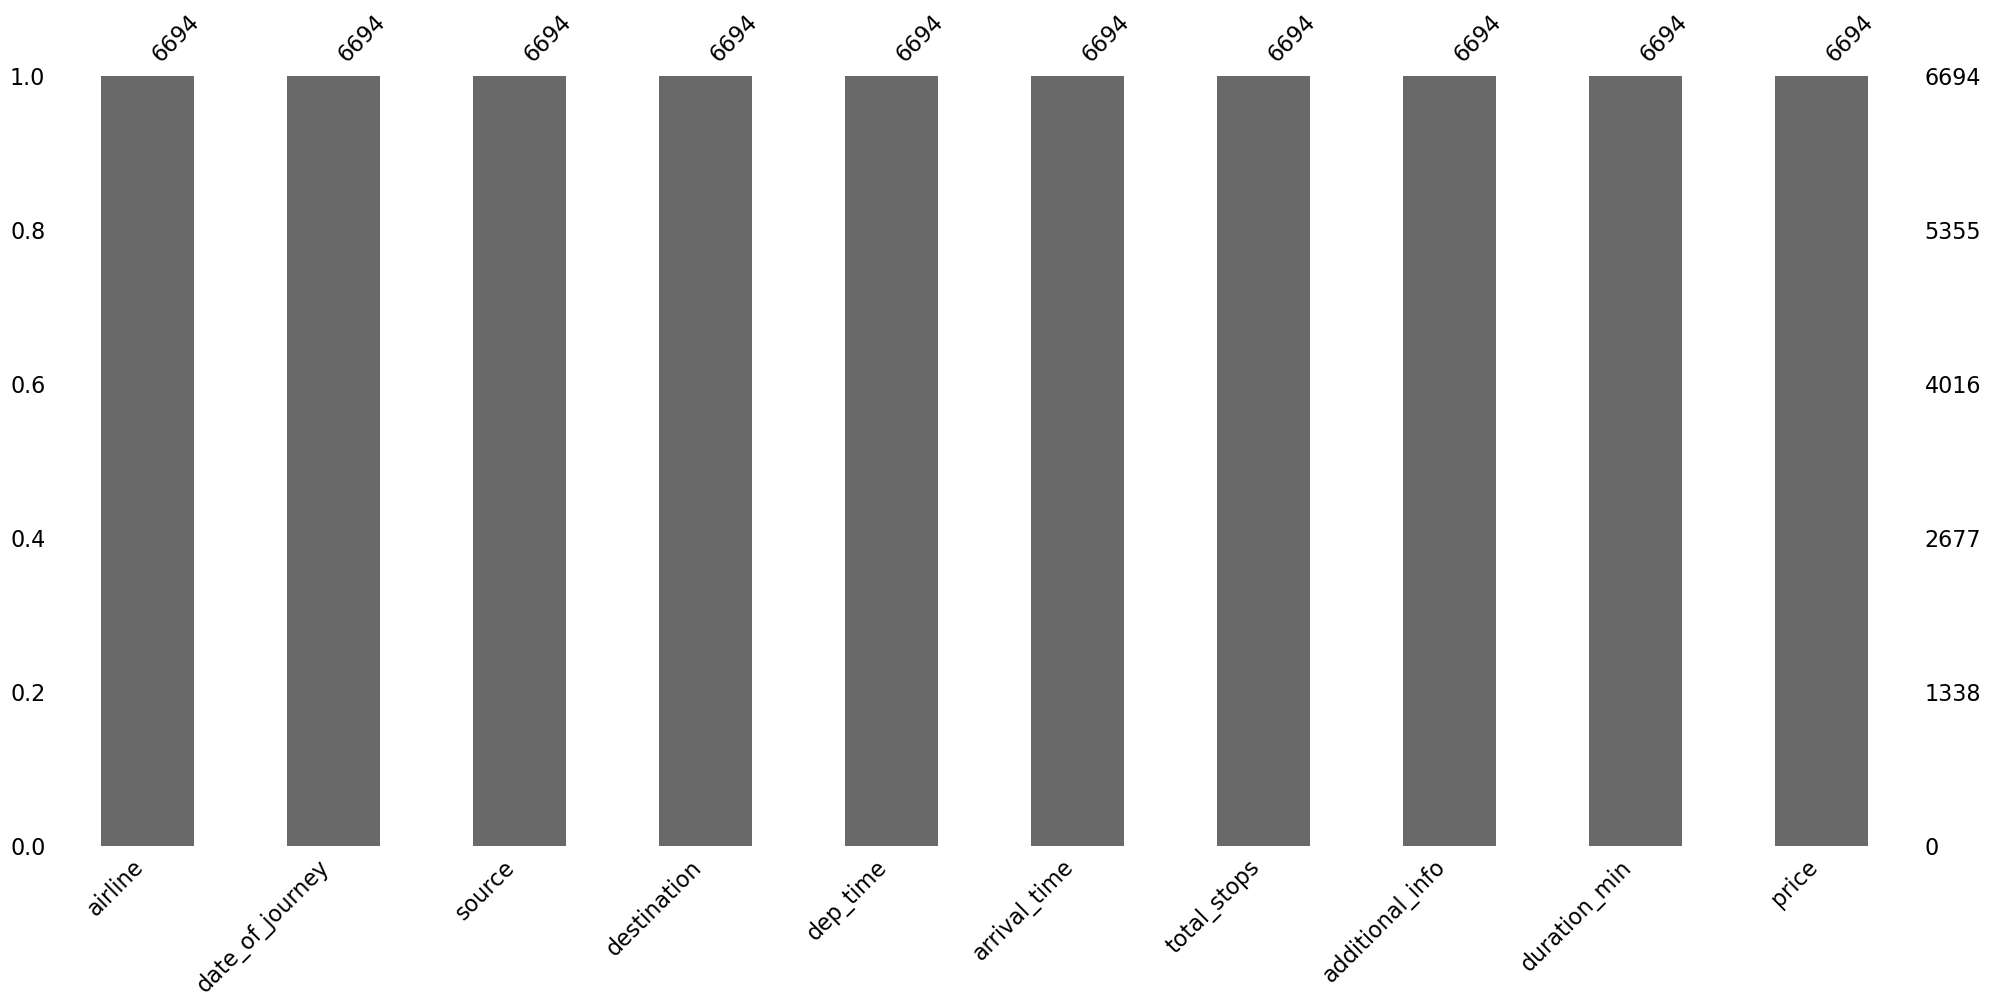

In [32]:
msno.bar(train)

## High Level Analysis of Outliers

In [33]:
forest = IsolationForest(n_estimators = 50,random_state = 28)

outlier = forest.fit_predict(train.drop(columns = 'price').select_dtypes(include = 'number'))

In [34]:
train['outlier'] = outlier

In [35]:
train.query('outlier==-1')

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info,duration_min,price,outlier
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,2,No Info,1420,10975,-1
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,0,No Info,90,2227,-1
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,0,No Info,85,5678,-1
7,Jet Airways,2019-05-09,Delhi,Cochin,23:05:00,04:25:00,2,No Info,1760,15129,-1
8,Jet Airways,2019-06-12,Kolkata,Banglore,14:05:00,10:05:00,1,No Info,1200,13044,-1
...,...,...,...,...,...,...,...,...,...,...,...
6678,Jet Airways,2019-03-24,Banglore,New Delhi,05:45:00,10:25:00,1,In-flight meal not included,280,8147,-1
6681,Jet Airways,2019-06-21,Delhi,Cochin,11:00:00,14:15:00,0,In-flight meal not included,195,4256,-1
6682,Jet Airways,2019-05-01,Kolkata,Banglore,09:35:00,14:25:00,1,No Info,1730,11467,-1
6687,Jet Airways,2019-06-15,Delhi,Cochin,21:25:00,12:35:00,2,In-flight meal not included,910,9905,-1


## Pair Plots

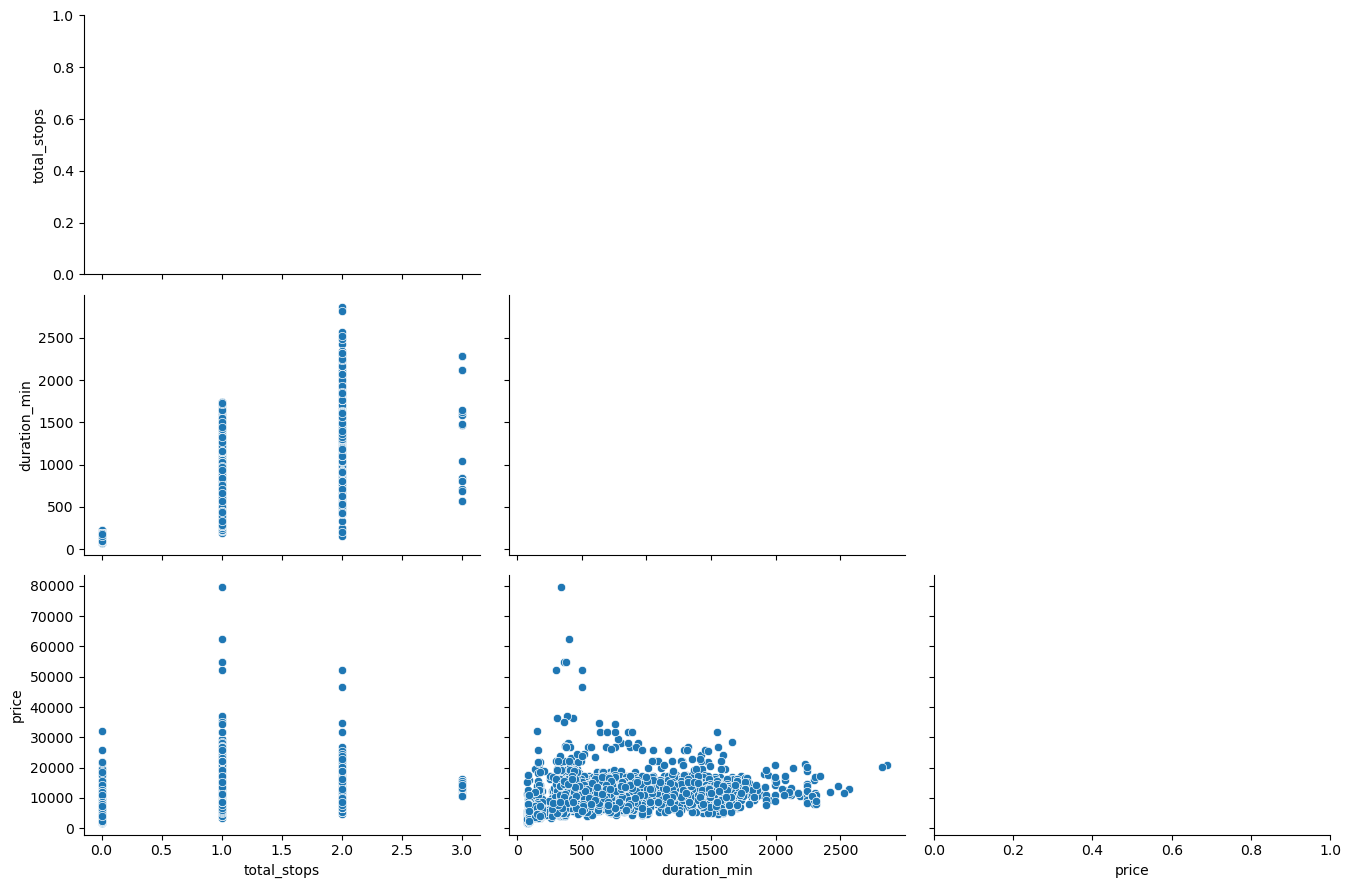

In [36]:
eda_helper_functions.pair_plots(train.drop(columns = 'outlier'))

## Correlation Analysis

<Axes: >

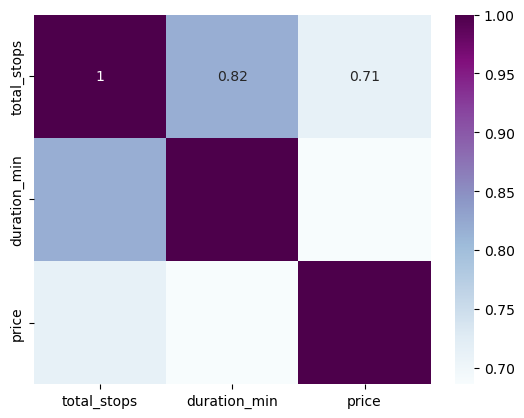

In [37]:
sns.heatmap(train.drop(columns = 'outlier').select_dtypes(include = 'number').corr(method = 'spearman'),annot = True,cmap='BuPu')

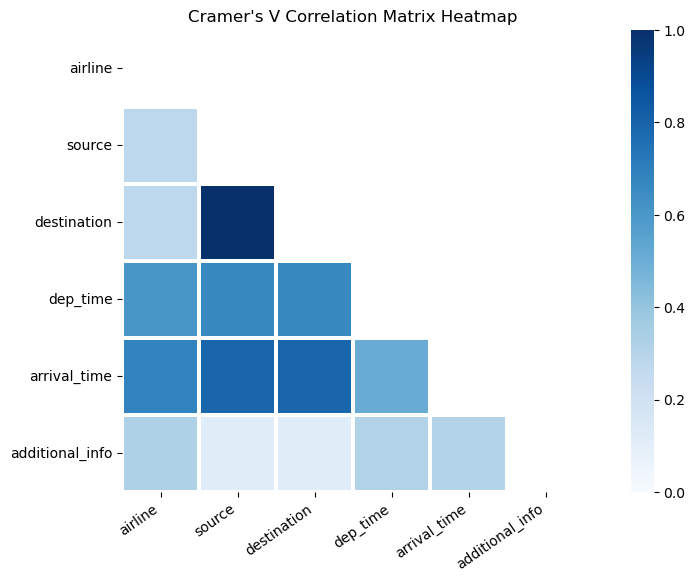

In [38]:
# for finding correlation between categorical variables
eda_helper_functions.cramersV_heatmap(train)

## Detailed Analysis

In [39]:
print('Features avaliable: ',[i for i in train.columns])

Features avaliable:  ['airline', 'date_of_journey', 'source', 'destination', 'dep_time', 'arrival_time', 'total_stops', 'additional_info', 'duration_min', 'price', 'outlier']


### Ananalyis of Airline Feature

In [40]:
eda_helper_functions.cat_summary(train,'airline')

0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2387


,count,percentage
category,,
Jet Airways,2387,0.356588
Indigo,1281,0.191365
Air India,1087,0.162384
Multiple Carriers,768,0.114730
Spicejet,534,0.079773
Vistara,301,0.044966
Air Asia,215,0.032118
Goair,120,0.017927
Trujet,1,0.000149


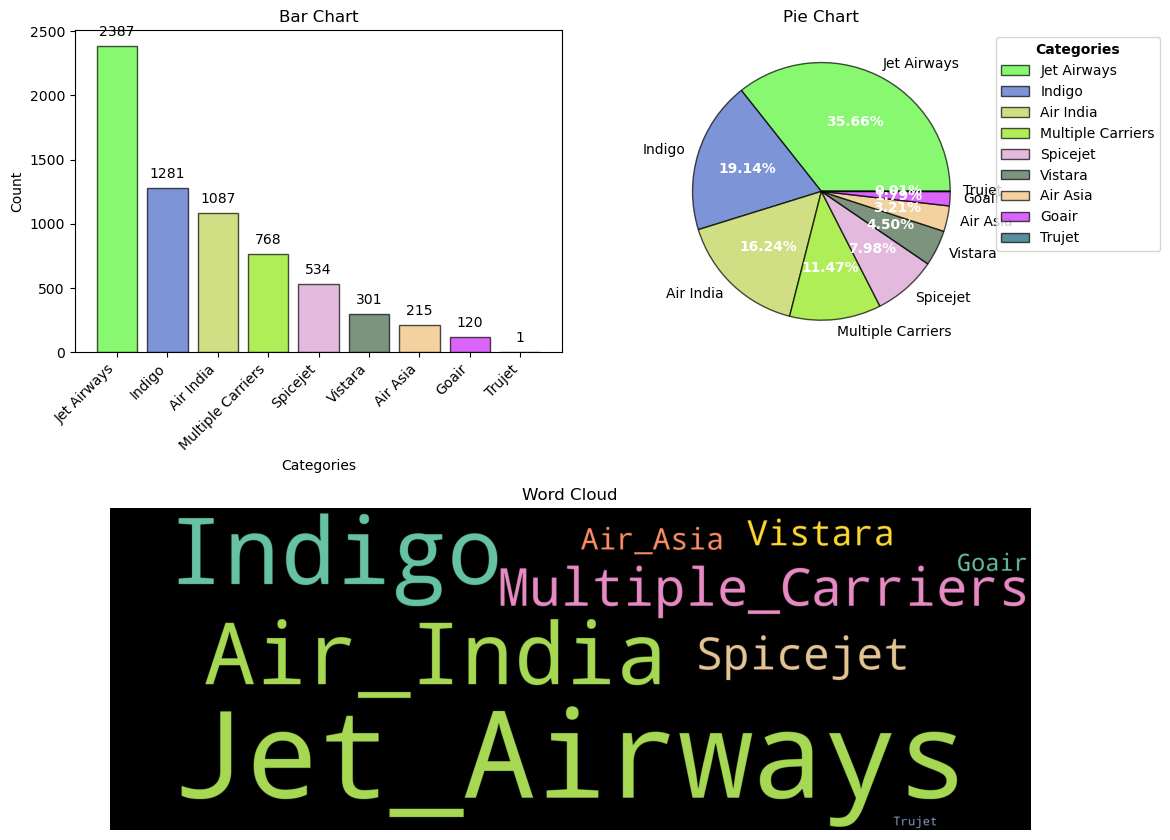

In [41]:
eda_helper_functions.cat_univar_plots(train, "airline")

### Idea: We can retain categories above 4% frequency and club all the others together as 'Other'

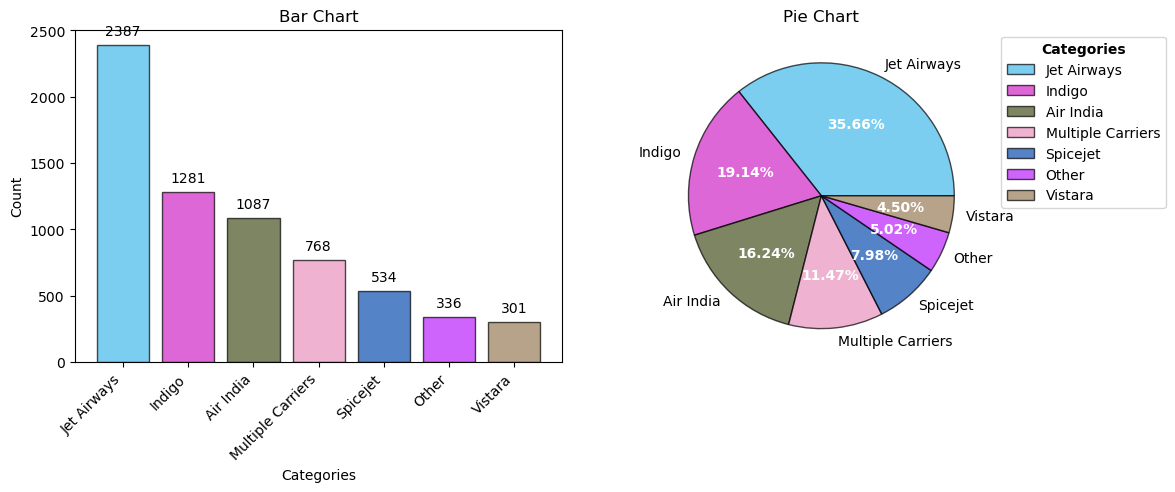

In [44]:
eda_helper_functions.cat_univar_plots(train, "airline", k = 6,show_wordcloud = False)

## Bivariate Analysis of Airline wrt Price

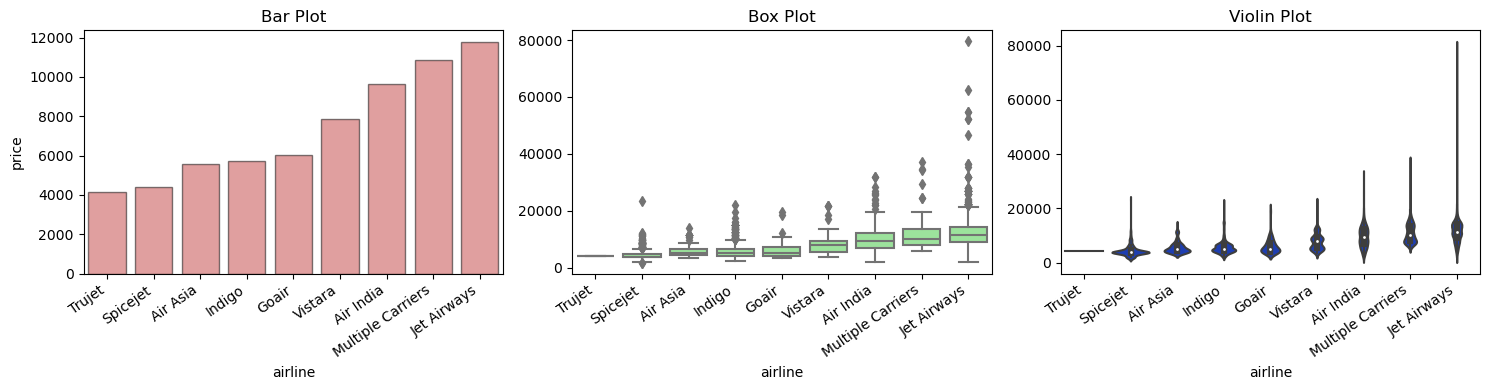

In [46]:
eda_helper_functions.num_cat_bivar_plots(train,num_var='price',cat_var='airline')

## Hypothesi Testing of Airline feature

In [47]:
eda_helper_functions.num_cat_hyp_testing(train,cat_var='airline',num_var = 'price')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 446.0707433362749
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3062.6099595740966
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


### We may make use of Seaborn Facetgrid to check the relationship between 3 variables: Price, Airline and destination

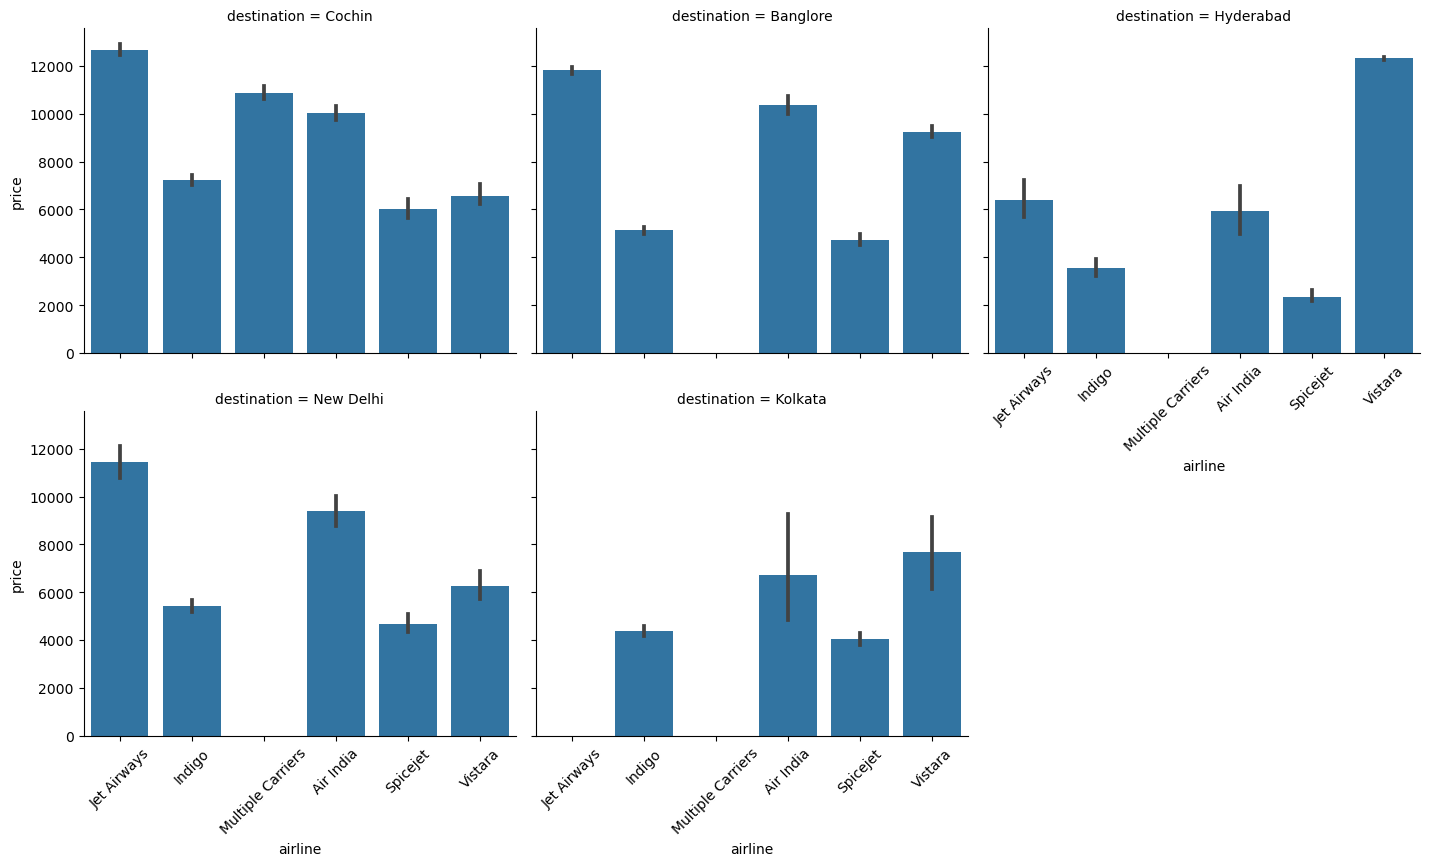

In [71]:
airline_grid = sns.FacetGrid(train,col = 'destination',height = 4, aspect=1.2,sharey = True,col_wrap=3)

airline_grid.map(sns.barplot,'airline','price',order = ['Jet Airways','Indigo','Multiple Carriers','Air India','Spicejet','Vistara'])

# rotating xticks
for ax in airline_grid.axes:
    ax.tick_params(axis='x', rotation=45)
    
plt.show()

### We may make use of Seaborn Facetgrid to check the relationship between 3 variables: Price, Airline and source

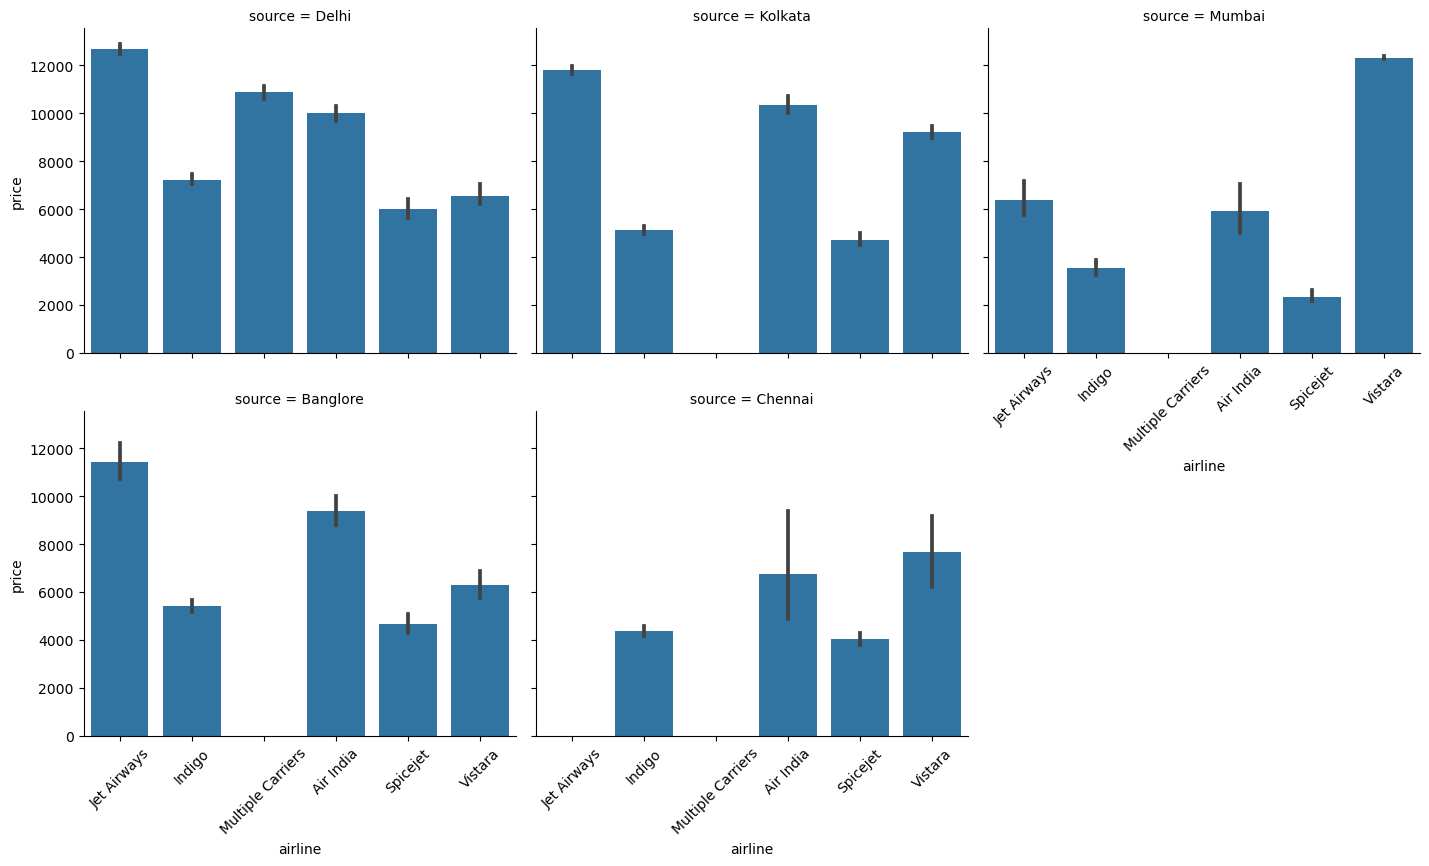

In [70]:
airline_grid = sns.FacetGrid(train,col = 'source',height = 4, aspect=1.2,sharey = True,col_wrap=3)

airline_grid.map(sns.barplot,'airline','price',order = ['Jet Airways','Indigo','Multiple Carriers','Air India','Spicejet','Vistara'])

# rotating xticks
for ax in airline_grid.axes:
    ax.tick_params(axis='x', rotation=45)
    
plt.show()

## Detailed Analysis of Date of Journey

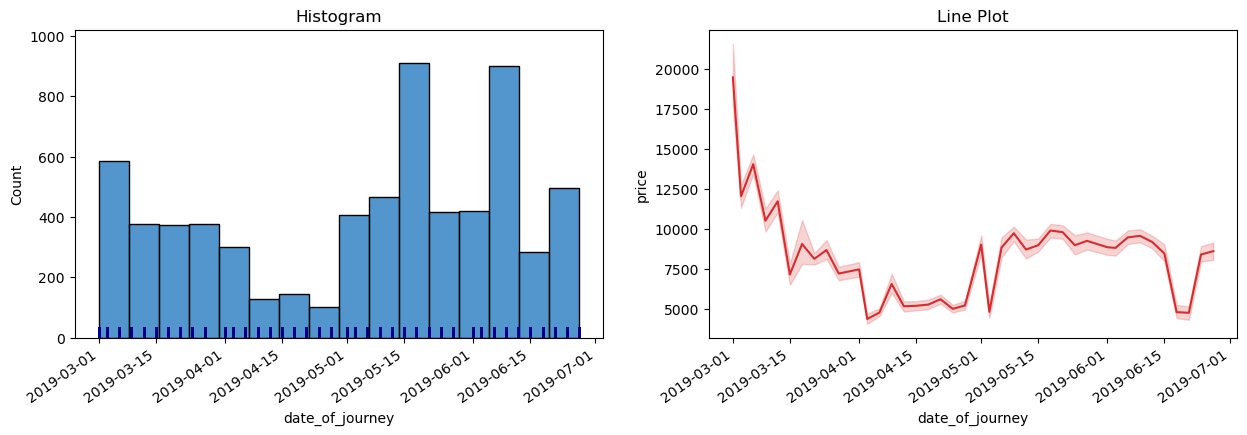

In [72]:
eda_helper_functions.dt_univar_plots(train,var = 'date_of_journey',target= 'price')

## Monthwise Price Trends

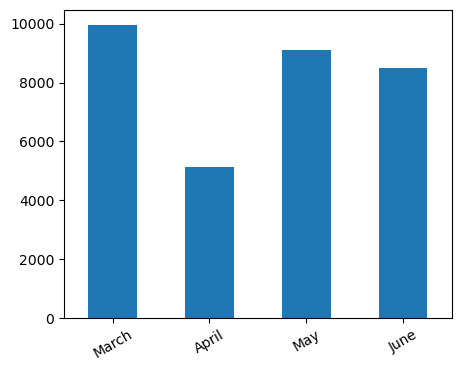

In [83]:
train.groupby(pd.Grouper(key = 'date_of_journey',freq = 'M'))['price']\
.median().set_axis(['March','April','May','June']).plot(kind = 'bar',figsize = (5,4))
plt.xticks(rotation = 30)
plt.show()

### Weekwise Price Trends

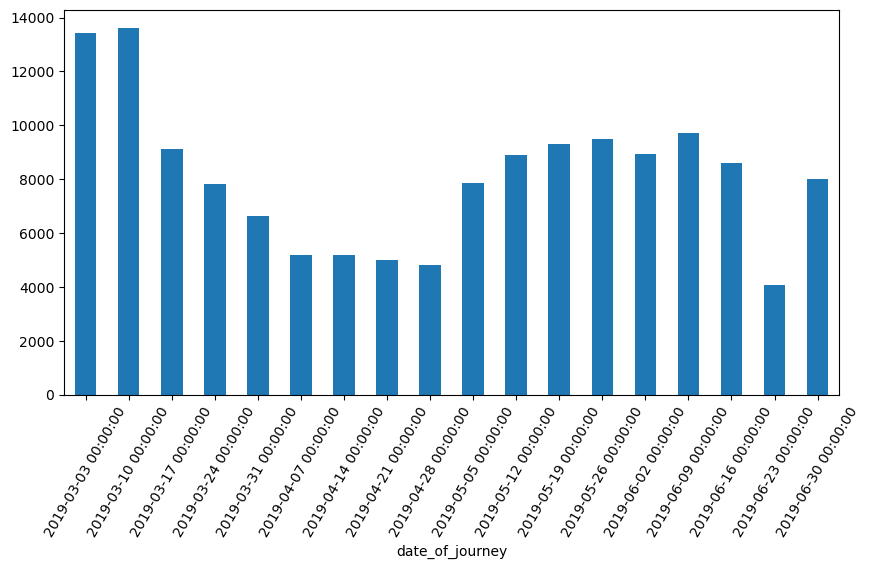

In [89]:
train.groupby(pd.Grouper(key = 'date_of_journey',freq = 'W'))['price']\
.median().plot(kind = 'bar',figsize = (10,5))
#.set_axis(['March','April','May','June'])\
#.plot(kind = 'bar',figsize = (5,4))
plt.xticks(rotation = 60)
plt.show()

## Time Series Analysis of Price wrt to Source City

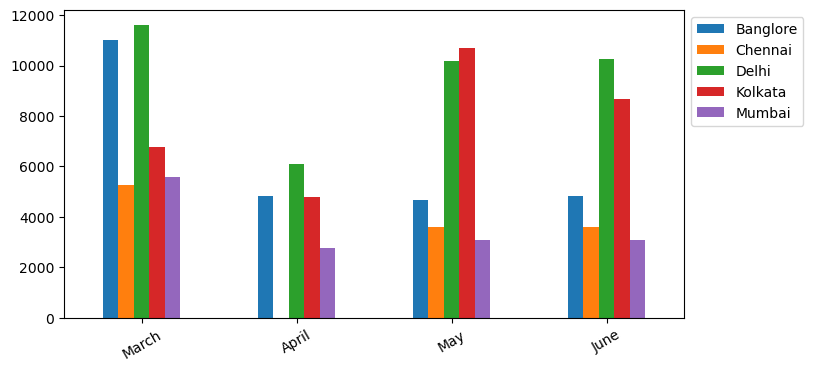

In [101]:
train.groupby([pd.Grouper(key = 'date_of_journey',freq = 'M'),'source'])['price'].median()\
.unstack().set_axis(['March','April','May','June'])\
.plot(kind = 'bar',figsize = (8,4))

plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))
plt.xticks(rotation = 30)
plt.show()